In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

X, y = datasets.make_hastie_10_2(n_samples = 4000, random_state = 1)

In [2]:
X

array([[ 1.62434536, -0.61175641, -0.52817175, ..., -0.7612069 ,
         0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , ..., -0.87785842,
         0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072, ..., -0.93576943,
        -0.26788808,  0.53035547],
       ...,
       [ 0.46218262, -0.42059162, -1.24654904, ...,  0.87314701,
         0.58296013, -0.4551461 ],
       [-0.64677332, -0.86871276, -0.51775489, ...,  0.56991635,
        -0.43518831, -1.09220707],
       [ 0.35065078,  0.06440647,  0.81061036, ...,  1.23113015,
         0.6633173 ,  0.04276902]])

In [3]:
y

array([ 1.,  1., -1., ..., -1., -1., -1.])

In [4]:
labels, y = np.unique(y, return_inverse = True)

In [5]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [6]:
labels

array([-1.,  1.])

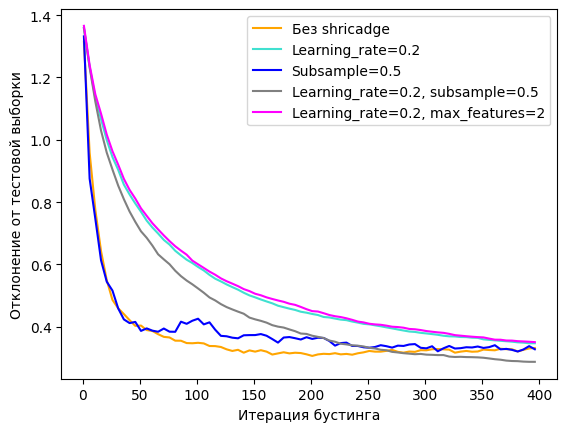

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
original_params = {"n_estimators":400,
                   "max_leaf_nodes":4,
                   "random_state":2,
                   "max_depth":None,
                   "min_samples_split":5}

plt.figure()

for label, color, setting in [
    ("Без shricadge", "orange",{"learning_rate":1.0,"subsample":1.0}),
    ("Learning_rate=0.2","turquoise",{"learning_rate":0.2,"subsample":1.0}),
    ("Subsample=0.5","blue",{"learning_rate":1.0,"subsample":0.5}),
    ("Learning_rate=0.2, subsample=0.5","gray",{"learning_rate":0.2,"subsample":0.5}),
    ("Learning_rate=0.2, max_features=2","magenta",{"learning_rate":0.2,"max_features":2})
]:
  params = dict(original_params)
  params.update(setting)

  gbc = GradientBoostingClassifier(**params)
  gbc.fit(X_train, y_train)

  test_deviance = np.zeros((params["n_estimators"]),dtype = np.float64)
  for i, y_proba in enumerate(gbc.staged_predict_proba(X_test)):
    test_deviance[i] = 2 * log_loss(y_test, y_proba[:,1])

  plt.plot((np.arange(test_deviance.shape[0])+1)[::5],test_deviance[::5],"-",color=color,label=label)


plt.legend(loc="upper right")
plt.xlabel("Итерация бустинга")
plt.ylabel("Отклонение от тестовой выборки")


plt.show()


In [10]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

--2023-08-20 19:26:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default of credit card clients.xls’

default of credit c     [ <=>                ]   5.28M  30.9MB/s    in 0.2s    

2023-08-20 19:26:25 (30.9 MB/s) - ‘default of credit card clients.xls’ saved [5539328]



In [11]:
df = pd.read_excel('/content/default of credit card clients.xls',header=1)
X=df.iloc[:,1:-1]
y = df.iloc[:,-1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, gbc.predict(X_train)))

0.8279047619047619


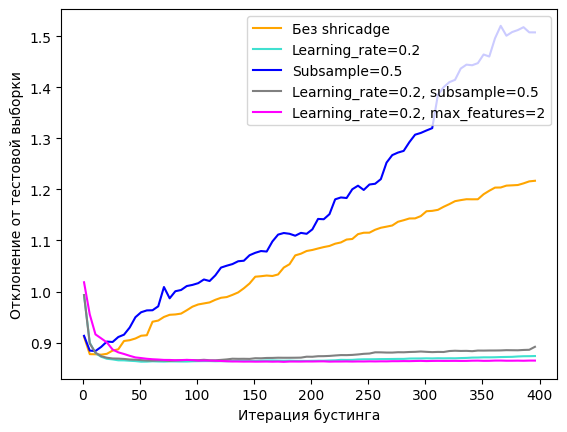

In [17]:
original_params = {"n_estimators":400,
                   "max_leaf_nodes":4,
                   "random_state":2,
                   "max_depth":None,
                   "min_samples_split":5}

plt.figure()

for label, color, setting in [
    ("Без shricadge", "orange",{"learning_rate":1.0,"subsample":1.0}),
    ("Learning_rate=0.2","turquoise",{"learning_rate":0.2,"subsample":1.0}),
    ("Subsample=0.5","blue",{"learning_rate":1.0,"subsample":0.5}),
    ("Learning_rate=0.2, subsample=0.5","gray",{"learning_rate":0.2,"subsample":0.5}),
    ("Learning_rate=0.2, max_features=2","magenta",{"learning_rate":0.2,"max_features":2})
]:
  params = dict(original_params)
  params.update(setting)

  gbc = GradientBoostingClassifier(**params)
  gbc.fit(X_train, y_train)

  test_deviance = np.zeros((params["n_estimators"]),dtype = np.float64)
  for i, y_proba in enumerate(gbc.staged_predict_proba(X_test)):
    test_deviance[i] = 2 * log_loss(y_test, y_proba[:,1])

  plt.plot((np.arange(test_deviance.shape[0])+1)[::5],test_deviance[::5],"-",color=color,label=label)


plt.legend(loc="upper right")
plt.xlabel("Итерация бустинга")
plt.ylabel("Отклонение от тестовой выборки")


plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

hyper_space = {'learning_rate':[0.1,0.2,0.3,0.4],'subsample':[0.4,0.5,0.6,0.7], 'max_depth':[None,3,6,9]}

gs = GridSearchCV(GradientBoostingClassifier(n_estimators=50),param_grid=hyper_space,scoring="accuracy",n_jobs=-1, cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=50),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [None, 3, 6, 9],
                         'subsample': [0.4, 0.5, 0.6, 0.7]},
             scoring='accuracy')

In [19]:
!pip install bayesian-optimization

In [20]:
print(gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.6}


In [22]:
print(gs.best_score_)

0.8229999999999998


In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=50, learning_rate=0.2,max_depth=9,subsample=0.6)
xgb.fit(X_train,y_train)

print(accuracy_score(y_train,xgb.predict(X_train)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.9046666666666666
0.811


In [26]:
from bayes_opt import BayesianOptimization

In [27]:
import xgboost as xgb

In [37]:
def xgb_class(learning_rate,subsample,max_depth):
  params = {"booster":'gbtree',
            "objective":"binary:logistic",
            "eval_metric":"auc",
            "is_unbalance":True,
            "n_estimators":50,
            "learning_rate":learning_rate,
            "subsample":subsample,
            "max_depth":int(max_depth),
            "reg_alpha":0.1,
            "reg_lambda":0.1,
            "gamma":10,
            "num_threads":20,
            "min_child_weight":1,
            "subsample_freq":5,
            "seed":42,
            "verbosity":0,
            "num_boost_round":1000
            }
  training_data = xgb.DMatrix(X_train,y_train)
  cv_result = xgb.cv(params,training_data,1000,early_stopping_rounds=100,stratified=True,nfold=3)
  return cv_result['test-auc-mean'].iloc[-1]

In [38]:
xgbBo = BayesianOptimization(xgb_class,{'learning_rate':(0.2,0.5),'subsample':(0.4,0.7), 'max_depth':(8,9)})
xgbBo.maximize(n_iter=3,init_points=2)

|   iter    |  target   | learni... | max_depth | subsample |
-------------------------------------------------------------
| 1         | 0.7733    | 0.3052    | 8.462     | 0.6648    |
| 2         | 0.7734    | 0.3933    | 8.19      | 0.5104    |
| 3         | 0.7708    | 0.3436    | 8.642     | 0.607     |
| 4         | 0.7698    | 0.3378    | 8.749     | 0.4507    |
| 5         | 0.769     | 0.4024    | 8.365     | 0.4861    |


In [46]:
import lightgbm

def lgb_classifier(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples,min_data_in_leaf):
  params={"boosting_type":'gbdt',
          "objective":"binary",
          "metric":"auc",
          "is_unbalance":True,
          "num_leaves":int(num_leaves),
          "lambda_l2":lambda_l2,
          "lambda_l1":lambda_l1,
          "num_threads":20,
          "min_child_samples":int(min_child_samples),
          "min_data_in_leaf":int(min_data_in_leaf),
          "learning_rate":0.1,
          "subsample_freq":5,
          "verbosity":-1
          }
  train_data = lightgbm.Dataset(X_train,y_train)
  cv_result = lightgbm.cv(params,train_data,1000,stratified=True,nfold=3)
  return cv_result['auc-mean'][-1]

In [47]:
lgbBo = BayesianOptimization(lgb_classifier,{'num_leaves':(25,4000),
                                             'max_depth':(0,9),
                                             'lambda_l2':(0.0,0.1),
                                             'lambda_l1':(0.0,0.1),
                                             'min_child_samples':(50,10000),
                                             'min_data_in_leaf':(100,2000)})

lgbBo.maximize(n_iter=15,init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------


KeyError: ignored